# Code by: Reham Essam ElDin ELTagoury
# Group: 5

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import seaborn as sns

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X=np.linspace(0, 20)
Y=-2*X+1


#### Plot your data points. 

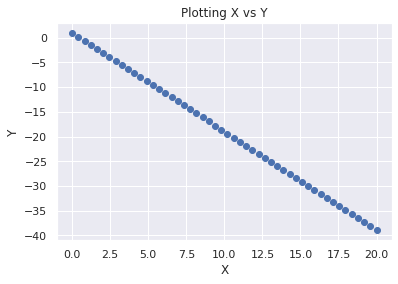

In [3]:
sns.set()
_=plt.scatter(X,Y)
_=plt.xlabel("X")
_=plt.ylabel("Y")
_=plt.title("Plotting X vs Y")

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

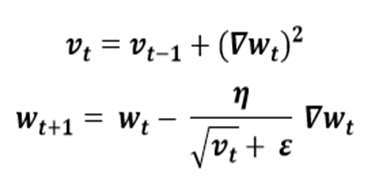

In [4]:
def Adagrad(X,Y,alpha,epochs,eps):
  theta0=theta1=0.0
  m=len(X)
  allpredictions=[]
  thetas0=[]
  thetas1=[]
  losses=np.array([])
  accum_grad0=accum_grad1=0.0
  e=1e-8
  for i in range(epochs):
      # for every epoch cal. all the losses and predictions
      y_pred=theta0+theta1*X
      allpredictions.append(y_pred)
      thetas0.append(theta0)
      thetas1.append(theta1)
      losses=np.append(losses,np.sum((y_pred-Y)**2)/(2*m))
      grad0=np.sum((y_pred-Y))/m
      grad1=np.sum((y_pred-Y)@X)/m
      grad=[grad0,grad1]
      accum_grad0+=(grad0)**2
      accum_grad1+=(grad1)**2
      
      theta0=theta0-(alpha/np.sqrt(accum_grad0+e))*grad0
      theta1=theta1-(alpha/np.sqrt(accum_grad1+e))*grad1
      if np.linalg.norm(grad)<=eps:
        return thetas0,thetas1,losses,allpredictions,theta0,theta1
  return thetas0,thetas1,losses,allpredictions,theta0,theta1

In [5]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=Adagrad(X,Y,0.1,30000,1e-3)
adagrad_pred=allpredictions[-1]
theta0,theta1

(0.997113219683624, -1.9997803086120263)

# R2_Score

In [6]:
r2_score(Y,allpredictions[-1])

0.9999999844969256

# plot losses vs epochs

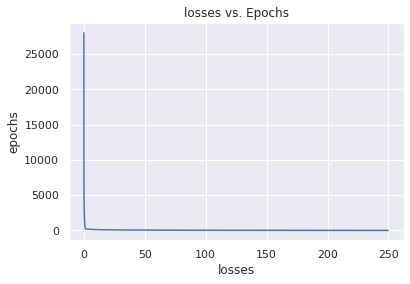

In [7]:
epochs=list(range(len(losses)))

_=plt.plot(losses,epochs)
_=plt.xlabel("losses")
_=plt.ylabel("epochs")
_=plt.title("losses vs. Epochs")

# plot all regression lines

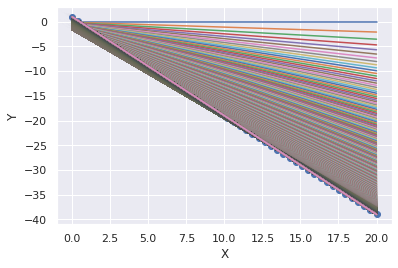

In [8]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# plot the optimal fitted line

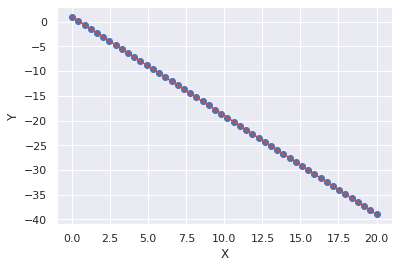

In [9]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y');

# losses vs thetas

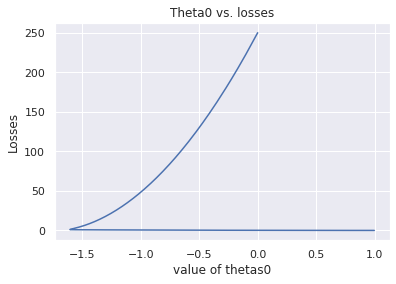

In [10]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses");

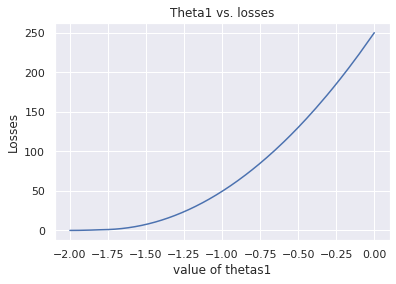

In [11]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses");

# Trying Different Hyperparameters

In [12]:
# dec alpha to 0.001
thetas0,thetas1,losses,allpredictions,theta0,theta1=Adagrad(X,Y,0.001,30000,1e-3)
r2_score(Y,allpredictions[-1])

-1.389637863500385

## not a sutibale value

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

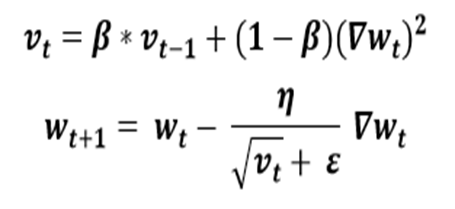

In [13]:
def RMSProp(X,Y,alpha,epochs,eps,gamma):
  theta0=theta1=0.0
  m=len(X)
  allpredictions=[]
  thetas0=[]
  thetas1=[]
  losses=np.array([])
  E_grad0=E_grad1=0.0
  e=1e-8
  for i in range(epochs):
      # for every epoch cal. all the losses and predictions
      y_pred=theta0+theta1*X
      allpredictions.append(y_pred)
      thetas0.append(theta0)
      thetas1.append(theta1)
      losses=np.append(losses,np.sum((y_pred-Y)**2)/(2*m))
      grad0=np.sum((y_pred-Y))/m
      grad1=np.sum((y_pred-Y)@X)/m
      grad=[grad0,grad1]
      E_grad0=E_grad0*gamma+0.1*(grad0**2)
      E_grad1=E_grad1*gamma+0.1*(grad1*2)
      
      theta0=theta0-(alpha/np.sqrt(E_grad0+e))*grad0
      theta1=theta1-(alpha/np.sqrt(E_grad1+e))*grad1
      if np.linalg.norm(grad)<=eps:
        return thetas0,thetas1,losses,allpredictions,theta0,theta1
  return thetas0,thetas1,losses,allpredictions,theta0,theta1

In [14]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=RMSProp(X,Y,0.001,10000,1e-3,0.9)
rmsprop_pred=allpredictions[-1]

# R2_score

In [15]:
r2_score(Y,allpredictions[-1])

0.99999999715003

# plot losses vs epochs

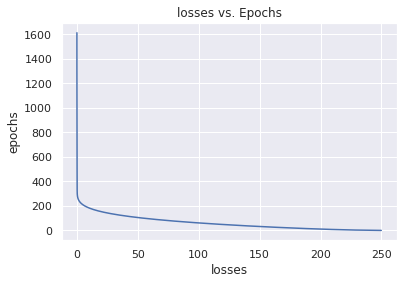

In [16]:
epochs=list(range(len(losses)))

_=plt.plot(losses,epochs)
_=plt.xlabel("losses")
_=plt.ylabel("epochs")
_=plt.title("losses vs. Epochs")

# plot all regression lines

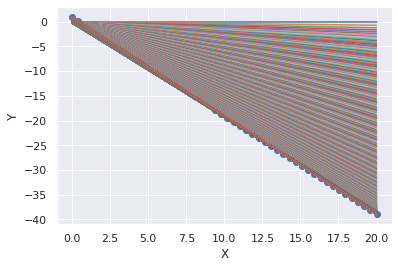

In [17]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# plot the optimal fitted line

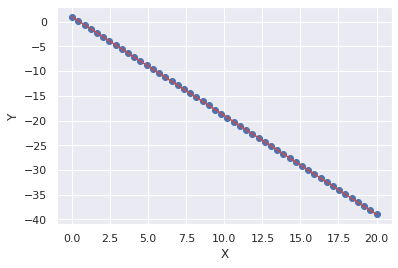

In [18]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# losses vs thetas

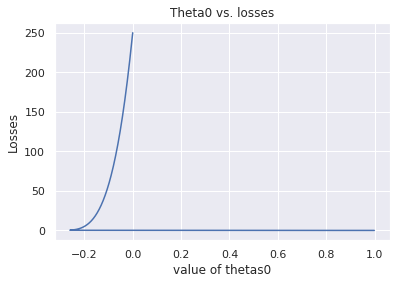

In [19]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses");

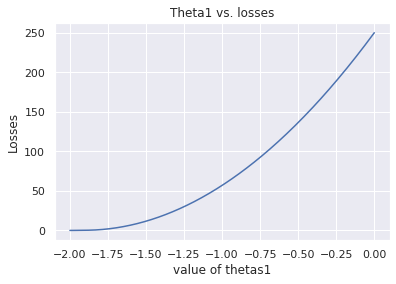

In [20]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses");

# Trying Different Hyperparameters

In [21]:
# dec beta to 0.01
thetas0,thetas1,losses,allpredictions,theta0,theta1=RMSProp(X,Y,0.001,10000,1e-3,0.1)
#r2_score(Y,allpredictions[-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


## notice here when we decresed the beta or chose a random value it gave an error in the square root the optimal value is 0.9

In [22]:
# dec beta to 0.5
thetas0,thetas1,losses,allpredictions,theta0,theta1=RMSProp(X,Y,0.001,10000,1e-3,0.5)
r2_score(Y,allpredictions[-1])


0.9999999993644862

#### no diffrence so we can choose it to be 0.5 but 0.9 gave more accuracy

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

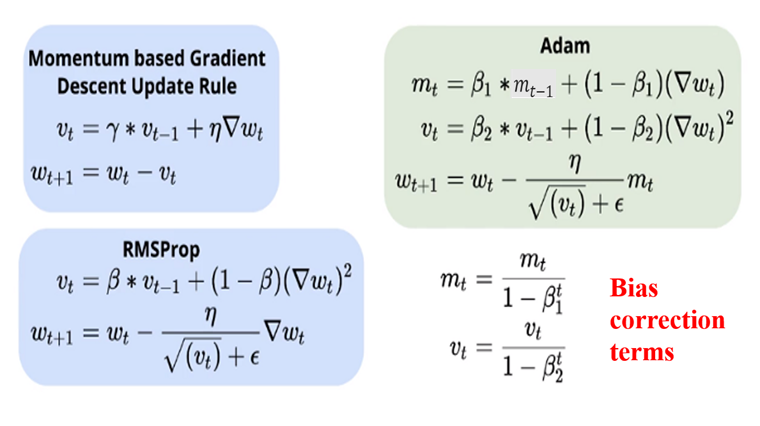

In [23]:
def ADAM(X,Y,alpha,epochs,eps,beta1,beta2):
  theta0=theta1=0.0
  m=len(X)
  allpredictions=[]
  thetas0=[]
  thetas1=[]
  losses=np.array([])
  mt1=mt0=vt0=vt1=mt_0=mt_1=vt_0=vt_1=0.0
  e=1e-8
  for i in range(epochs):
      # for every epoch cal. all the losses and predictions
      y_pred=theta0+theta1*X
      allpredictions.append(y_pred)
      thetas0.append(theta0)
      thetas1.append(theta1)
      losses=np.append(losses,np.sum((y_pred-Y)**2)/(2*m))
      grad0=np.sum((y_pred-Y))/m
      grad1=np.sum((y_pred-Y)@X)/m
      grad=[grad0,grad1]
   # decaying averages of past gradients
      mt_0=mt_0*beta1+(1-beta1)*grad0
      mt_1=mt_1*beta1+(1-beta1)*grad1
   # decaying averages of past squared gradients
      vt_0=beta2*vt_0+(1-beta2)*(grad0**2)
      vt_1=beta2*vt_1+(1-beta2)*(grad1**2)
   # bias-corrected first moment
      mt0=mt_0/(1-beta1)
      mt1=mt_1/(1-beta1)
   # bias-corrected second moment
      vt0=vt_0/(1-beta2)
      vt1=vt_1/(1-beta2)
   # update theta0 and theta1 
      theta0=theta0-(alpha/(np.sqrt(vt0)+e))*mt0
      theta1=theta1-(alpha/(np.sqrt(vt1)+e))*mt1
   # Stop condition
      if np.linalg.norm(grad)<=eps:
        return thetas0,thetas1,losses,allpredictions,theta0,theta1
  return thetas0,thetas1,losses,allpredictions,theta0,theta1

In [24]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=ADAM(X,Y,0.01,100000,1e-3,0.9,0.999)
adam_pred=allpredictions[-1]

# R2_score

In [25]:
r2_score(Y,allpredictions[-1])

0.9999999838286857

# plot losses vs epochs

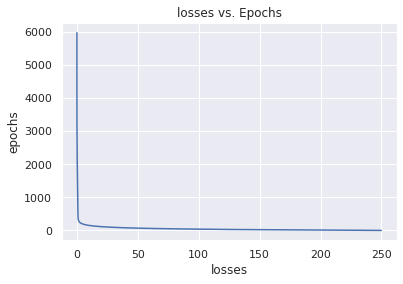

In [26]:
epochs=list(range(len(losses)))

_=plt.plot(losses,epochs)
_=plt.xlabel("losses")
_=plt.ylabel("epochs")
_=plt.title("losses vs. Epochs")

# plot all regression lines

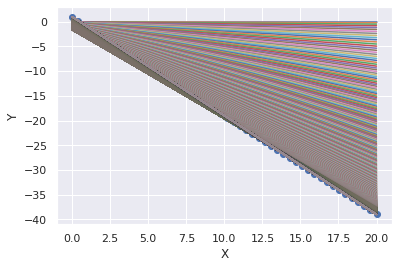

In [27]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# plot the optimal fitted line

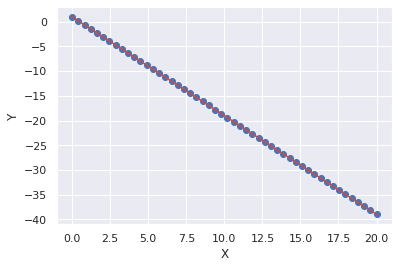

In [28]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# losses vs thetas

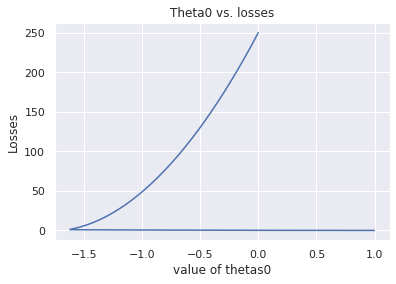

In [29]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title("Theta0 vs. losses");

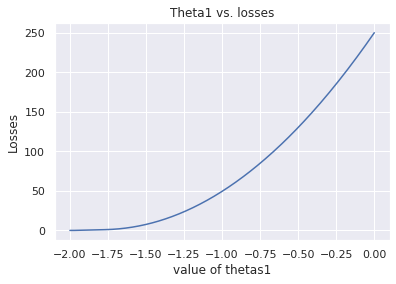

In [30]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title("Theta1 vs. losses");

# Trying diffirent Hyperprameter

In [31]:
# tring beta1 with small value and beta2 with high value and alpha with very small value and observ the r2score
thetas0,thetas1,losses,allpredictions,theta0,theta1=ADAM(X,Y,0.0001,100000,1e-3,0.1,0.999)
r2_score(Y,allpredictions[-1])


-1.3174876049793602

### we notice that dec the alpha leading to r2_score with negative values which is not a good thing this algorithm is done to not tune the alpha and make it 0.01 so that the other two prams can tune the alpha

# Ploting ADAGRAD,ADADELTA,ADAM

In [32]:
thetas0,thetas1,losses,allpredictions_adagrad,theta0,theta1=Adagrad(X,Y,0.001,10000,1e-3)
adagrad_pred=allpredictions_adagrad[-1]

In [33]:
thetas0,thetas1,losses,allpredictions_rms,theta0,theta1=RMSProp(X,Y,0.001,10000,1e-3,0.9)
rmsprop_pred=allpredictions_rms[-1]

In [34]:
thetas0,thetas1,losses,allpredictions_adam,theta0,theta1=ADAM(X,Y,0.001,10000,1e-3,0.9,0.999)
adam_pred=allpredictions_adam[-1]

R2_score: 
Adagrad -1.862810649101096
Rmsprop 0.99999999715003
Adam 0.991796296582634


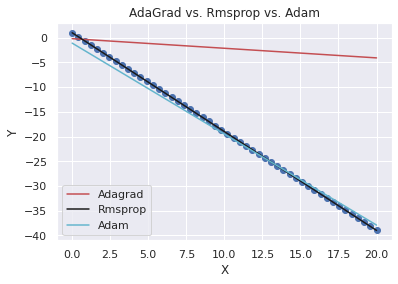

In [35]:
plt.scatter(X,Y)
plt.plot(X,adagrad_pred,color='r')
plt.plot(X,rmsprop_pred,color='k')
plt.plot(X,adam_pred,color='c')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["Adagrad","Rmsprop","Adam"])
plt.title("AdaGrad vs. Rmsprop vs. Adam");
print("R2_score: ")
print("Adagrad",r2_score(Y,allpredictions_adagrad[-1]))
print("Rmsprop",r2_score(Y,allpredictions_rms[-1]))
print("Adam",r2_score(Y,allpredictions_adam[-1]))

## Congratulations 
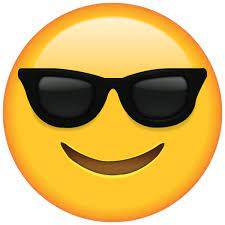